In [1]:
# Load packages

import pandas as pd
import altair as alt

# Need to enable this to allow work with larger datasets (https://altair-viz.github.io/user_guide/faq.html)
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
from vega_datasets import data

## Data Source and Description

My data source is the [Movie](https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json) dataset from `vega-datasets`.

> - The movies dataset has the information about the movie itself, the rating information from famous movie rating websites, IMDB and Rotten Tomatoes, and the profit earned by the movie in US and worldwide.
> - It is provided in the Vega Datasets Python package, yet there is no data description about this movies dataset. 
> - The time when this data is collected is unknown because it has listed both released movies dates and planned to release dates, so it is hard to trace the date of collection.
> - It is likely that this dataset is provided for movie associations to do analysis into movie-related problems like movie rating, movie types, movie budget and profits, etc. It is also a summary of movie data that may meet some movie fan's interest. 
> - This dataset may be collected by joining datasets of movie reviews, movie information and movie gross. These data mostly should be available online, and the join could be simply done by matching the movie titles.

## Load dataset and Explore

In [27]:
df = data.movies()
df.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


In [4]:
df['Major_Genre'].unique()

array([None, 'Drama', 'Comedy', 'Musical', 'Thriller/Suspense',
       'Adventure', 'Action', 'Romantic Comedy', 'Horror', 'Western',
       'Documentary', 'Black Comedy', 'Concert/Performance'], dtype=object)

In [5]:
df['Creative_Type'].unique()

array([None, 'Contemporary Fiction', 'Science Fiction',
       'Historical Fiction', 'Fantasy', 'Dramatization', 'Factual',
       'Super Hero', 'Multiple Creative Types', 'Kids Fiction'],
      dtype=object)

In [6]:
### Your answer here (feel free to add more cells if you need them)

df.describe(include = 'all')

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
count,2755,1870,2969,2988.000000,2988.000000,2596,2926,3.200000e+03,3201,2321.000000,1209.000000,2836,3200,5.640000e+02,3.194000e+03,3.194000e+03
unique,9,550,174,NaN,NaN,7,12,NaN,1600,NaN,NaN,18,3176,NaN,NaN,NaN
top,Contemporary Fiction,Steven Spielberg,Warner Bros.,NaN,NaN,R,Drama,NaN,Oct 11 2002,NaN,NaN,Original Screenplay,The Texas Chainsaw Massacre,NaN,NaN,NaN
freq,1453,23,318,NaN,NaN,1194,789,NaN,9,NaN,NaN,1536,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.283467,29908.644578,NaN,NaN,3.106917e+07,NaN,54.336924,110.193548,NaN,NaN,3.490155e+07,4.400209e+07,8.534340e+07
std,NaN,NaN,NaN,1.252290,44937.582335,NaN,NaN,3.558591e+07,NaN,28.076593,20.171014,NaN,NaN,4.589512e+07,6.255531e+07,1.499473e+08
min,NaN,NaN,NaN,1.400000,18.000000,NaN,NaN,2.180000e+02,NaN,1.000000,46.000000,NaN,NaN,6.184540e+05,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,5.600000,4828.500000,NaN,NaN,6.575000e+06,NaN,30.000000,95.000000,NaN,NaN,9.906211e+06,5.493221e+06,8.031285e+06
50%,NaN,NaN,NaN,6.400000,15106.000000,NaN,NaN,2.000000e+07,NaN,55.000000,107.000000,NaN,NaN,2.033156e+07,2.201947e+07,3.116893e+07
75%,NaN,NaN,NaN,7.200000,35810.500000,NaN,NaN,4.200000e+07,NaN,80.000000,121.000000,NaN,NaN,3.779422e+07,5.609176e+07,9.728380e+07


## Data Wrangling

In [225]:
df_1 = (df[['Title','US_Gross', 'Major_Genre', 'US_DVD_Sales']]
        .dropna()
        .query('US_Gross > 0')
       )

genres = list(df_1['Major_Genre'].unique())
df_1.describe(include = 'all')


,Title,US_Gross,Major_Genre,US_DVD_Sales
count,557,5.570000e+02,557,5.570000e+02
unique,557,NaN,12,NaN
top,See No Evil,NaN,Drama,NaN
freq,1,NaN,138,NaN
mean,NaN,6.743178e+07,NaN,3.509303e+07
std,NaN,8.275814e+07,NaN,4.609848e+07
min,NaN,3.047100e+04,NaN,6.184540e+05
25%,NaN,1.730342e+07,NaN,9.952465e+06
50%,NaN,3.857777e+07,NaN,2.057680e+07
75%,NaN,8.161256e+07,NaN,3.803826e+07


In [192]:
df_2 = (df[['Creative_Type', 'IMDB_Rating', 'Worldwide_Gross', 'Title']]
       .dropna()
       .query('Creative_Type == "Super Hero" & Worldwide_Gross > 0'))

In [193]:
df_2.describe(include = 'all')

,Creative_Type,IMDB_Rating,Worldwide_Gross,Title
count,47,47.000000,4.700000e+01,47
unique,1,NaN,NaN,47
top,Super Hero,NaN,NaN,The Phantom
freq,47,NaN,NaN,1
mean,NaN,6.191489,2.801802e+08,NaN
std,NaN,1.430085,2.550331e+08,NaN
min,NaN,2.700000,1.686429e+06,NaN
25%,NaN,5.500000,8.186492e+07,NaN
50%,NaN,6.400000,2.377026e+08,NaN
75%,NaN,7.300000,3.829729e+08,NaN


## Research Questions

> 1. What is the relationship between the movie gross and DVD sales in the US? Is their relationship different for different movie genres?
> 2. What is the relationship between worldwide gross and IMDB ratings for super hero movies? Which movie has the highest IMDB rating and which one has the highest worldwide gross?


## Data Analysis & Visualizations



> The plot below is a scatter plot with US movie gross on the y-axis and US DVD sales on the x-axis. I choose the scatter plot because it can display the relationship clealy between these two variables and it is easy to observe. Because I am also exploring how the relationship vary by each movie genre, I have added a selection bar below the plot so that it is easy to choose to see the relationship of these two variables for each genre. As the gross and DVD sales are both very large numbers, I have transformed both axes to log-10 scale so that the data points are easier to read and the relationship is clearer. I choose to display the short form of the large numbers because it is easier to read and interpret. I have also added a tooltip that shows the title, genre, gross and DVD sales at the chosen data point so that it is easier to track the information at each point.

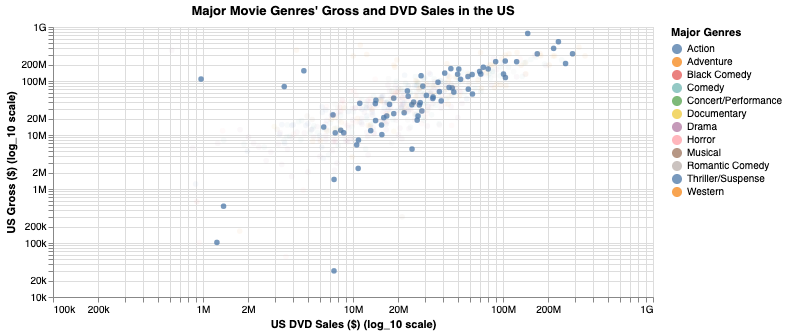

In [232]:
selectGenre = alt.selection_single(
    name='Select', 
    fields=['Major_Genre'],
    init={'Major_Genre': genres[0]}, 
    bind=alt.binding_select(options = genres)
)

p1 = alt.Chart(df_1).mark_circle().add_selection(
    selectGenre
).encode(
    alt.X('US_DVD_Sales:Q', scale = alt.Scale(type='log',base = 10, zero = False),
          axis = alt.Axis(format = "~s"),
          title = 'US DVD Sales ($) (log_10 scale)'
         ),
    alt.Y('US_Gross:Q', scale = alt.Scale(type='log',base = 10, zero = False),
          axis = alt.Axis(format = "~s"),
          title = 'US Gross ($) (log_10 scale)'
         ),
    alt.Color('Major_Genre:N', legend = alt.Legend(title = 'Major Genres')),
    alt.Tooltip(['Title:N','Major_Genre:N','US_Gross:Q','US_DVD_Sales:Q']),
    opacity=alt.condition(selectGenre, alt.value(0.75), alt.value(0.05))
).properties(width = 600, height = 270,
            title = "Major Movie Genres' Gross and DVD Sales in the US")
p1

This is a GIF version of my plot:

<img src='./imgs/plot1.gif' width="600"> 

> The plot below is also a scatter plot which is useful for showing the relationship between worldwide gross and IMDB rating of super hero movies clearly. I have transformed the axis of worldwide gross to a log-10 scale and changed the number format so that the axis is easier to read and the data points are clearer displayed. Also, I have added the selection and tooltip for the points that the audience can access and explore the information of each data point, which is also helpful to identify the movie with the highest rating or worldwide gross. 

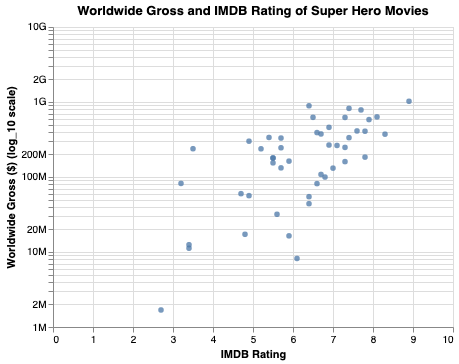

In [220]:
selection = alt.selection_single();

p2 = alt.Chart(df_2).mark_circle().add_selection(
selection
).encode(
    alt.X('IMDB_Rating:Q', scale = alt.Scale(domain = [0, 10]),
         title = 'IMDB Rating'),
    alt.Y('Worldwide_Gross:Q', scale = alt.Scale(type='log',base = 10, zero = False),
         axis = alt.Axis(format = "~s"),
        title = 'Worldwide Gross ($) (log_10 scale)'),
     alt.Tooltip(['Title:N', 'IMDB_Rating:Q', 'Worldwide_Gross']),
     opacity = alt.condition(selection, alt.value(0.75), alt.value(0.25))
    ).properties(width = 400, height = 300,
            title = "Worldwide Gross and IMDB Rating of Super Hero Movies")


p2

This is a GIF version of my plot:

<img src='./imgs/plot2.gif' width="600"> 

## Summary and conclusions

> 1. - Overall, the observed relationship in a log-log scale between the movie gross and DVD sales in the US is linear, and they are positively related. This means that the movie has a higher gross also has a higher DVD sale in the US.
    - The Action movies have 3 outliners, where the gross is about 100 million dollars, but the DVD sales is lower than 5 million dollars. Also, there is a movie, The Boondocks Saints, whose DVD sale is 7 million dollars but the gross is only 3 thousand dollars. And the Drama movies have an outliner, The Passion of the Christ, that its gross is higher than 300 million dollars, but the DVD sale is lower than 700 thousand dollars. For Horror movies, the movie Feast has over 3 million DVD sales, but has only around 5 thousand gross. There are 4 noticeable outliners in the Adventure genre. The movie Spider-Man 2 has a gross higher than 300 million dollars, but the DVD sale is only around 4 million dollars. The episodes IV, V and VI of Star Wars all have gross higher than 300 million dollars, but the DVD sales are all around 10 million dollars only. These 4 movie genres, Action, Drama, Horror and Adventure, have relatively more outliners, and the relationship is less clear, so further research should be done on these 4 genres to find explanations for those outliners. My guess will be that some movies of these genres are so popular that people would rather watch them in the theatre than watch them at home, but overall movies have high gross are likely to have high DVD sales too because the number of outliners is small.
    - The Thriller/Suspense, Comedy, Romantic Comedy movies data generally have a clear linear relationship in the log-log scale between the gross and DVD sales. The other movie genres have very few data points which are not enough to show the relationship clearly.

> 2. - The overall observed relationship between the log-scale of worldwide gross and IMDB rating of super hero movies is positive such that the higher rated movies tend to have higher worldwide gross, but the plot does not reveal whether the relationship is linear because the points are too scattered. 
    - From the plot, the highest rated movie, The Dark Knight, is also the one that has the highest worldwide gross. Meanwhile, the lowest rated movie, Steel, is also the one that has the lowest worldwide gross.
    - Therefore, I conclude that although the specific relationship between worldwide gross and IMDB rating for super hero movies is not clear, they should be positively correlated.
